#Cumulative Assignment 1: Machine Learning with Python
This is the INDIVIDUAL assignment for ISBA 4790- Machine Learning with Python. The assignment is due by **Tuesday February 15 at 16:00 PM**. Your submissions will be examined by [TurnItIn](https://en.wikipedia.org/wiki/Turnitin) for plaigiarism. If you use any piece of code from web or anywhere else, you should add the reference as a comment. It is fine to reuse others' (non-students) code as long as you reference them. You are not allowed to share your work or talk about this assignment with each other.

## The Business Case
A commercially successful movie not only entertains audience, but also enables film companies to gain tremendous profit. A lot of factors such as good directors, experienced actors are considerable for creating good movies. However, famous directors and actors can always bring an expected box-office income but cannot guarantee a highly rated imdb score.

## Data Description
The dataset is from Kaggle website. You may download [the dataset here](https://drive.google.com/file/d/1lQ6VmIygkSnukT-hwFFuu3CTCiGFVhhF/view?usp=sharing). It contains 28 variables for about 5K movies, spanning across 100 years in over 60 countries. There are over 2K unique director names, and thousands of actors/actresses.

* **movie_title**	Title of the Movie
* **duration**	Duration in minutes
* **director_name**	Name of the Director of the Movie
* **director_facebook_likes**	Number of likes of the Director on his Facebook Page
* **actor_1_name**	Primary actor starring in the movie
* **actor_1_facebook_likes**	Number of likes of the Actor_1 on his/her Facebook Page
* **actor_2_name**	Other actor starring in the movie
* **actor_2_facebook_likes**	Number of likes of the Actor_2 on his/her Facebook Page
* **actor_3_name**	Other actor starring in the movie
* **actor_3_facebook_likes**	Number of likes of the Actor_3 on his/her Facebook Page
* **num_user_for_reviews**	Number of users who gave a review
* **num_critic_for_reviews**	Number of critical reviews on imdb
* **num_voted_users**	Number of people who voted for the movie
* **cast_total_facebook_likes**	Total number of facebook likes of the entire cast of the movie
* **movie_facebook_likes**	Number of Facebook likes in the movie page
* **plot_keywords**	Keywords describing the movie plot
* **facenumber_in_poster**	Number of the actor who featured in the movie poster
* **color**	Film colorization. ‘Black and White’ or ‘Color’
* **genres**	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
* **title_year**	The year in which the movie is released (1916:2016)
* **language**	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
* **country**	Country where the movie is produced
* **content_rating**	Content rating of the movie
* **aspect_ratio**	Aspect ratio the movie was made in
* **movie_imdb_link**	IMDB link of the movie
* **gross**	Gross earnings of the movie in Dollars
* **budget**	Budget of the movie in Dollars
* **imdb_score**	IMDB Score of the movie on IMDB

## Problem Steps
Please go through the following problems and produce the code that answers the problem. 
* Properly comment your code so it is easy to read and understand. 
* If you reuse any piece of code from web or anywhere else, you should add the reference/link as a comment right where you are reusing the code.
* When finished, save the notebook, and download it in .ipynb file format. You submit the notebook file on the Brightspace.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy import nan

## Data Ingestion & Cleaning
1. Read the dataset into a dataframe. Use [.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head) to check out the first few rows and use [.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)to see a summary statistics of the dataset.



In [3]:
df = pd.read_csv("/content/drive/MyDrive/colabData/IMDBDataset.csv")

2. There are some duplicate rows of data. Use [.drop_duplicate()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates) to remove the duplicates. Make sure you print out the number of records (movies) in the dataset before and after duplicate removal.

In [4]:
print(len(df))

5043


In [5]:
df.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [6]:
print(len(df))

5043


3. Try to slice the data for a movie_title called "Avatar"; can you find that? If not, it is probably because many movie titles have some whitespaces before/after the title; they might have been generated during the data collection. Use [.str.strip()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html) to remove them whitespaces. Try again to slice the dataset for movie_title of "Avatar".

In [7]:
df["movie_title"] = df["movie_title"].str.strip()

In [8]:
df.loc[df["movie_title"] == "Avatar"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


4. Drop all the movies with title_year of less than 2000. Those are considered too old to be used for predictive purposes.

In [9]:
df = df[df.title_year >= 2000]

5. Drop the movies with missing values. Print the number of movies left.

In [10]:
df.dropna(inplace=True)

In [11]:
print(len(df))

2730


##Data Preparation

6. Add two new columns to the dataset; one including the profit and another the ROI (Return on Investement) for each movie. We assume only half the gross revenue goes to the producer and the other half to the movie theaters and others. So, consider profit = gross/2 - budget and ROI = (profit/budget)*100.

In [12]:
df["profit"] = (df.gross/2) - df.budget

In [13]:
df["ROI"] = (df.profit/df.budget) * 100

7. Add another column that calculated a new quality rating for the movies. The new rating called "imdb_quality" would be the imdb_score multiplied by the num_user_for_reviews. We susspect this may be a better predictor of movie success.


In [14]:
df["imdb_quality"] = df.imdb_score * df.num_user_for_reviews

8. Create five dummy/boolean variables as five new columns to the dataframe. The column names would be Action, Crime, Drama, Documentary, Romance. Action column should be True for any movie if 'Action' is inside its genres. That would be the case for other genre columns like Crime, Drama, etc. If you like, you can add more columns for other genres.

In [15]:
df["Action"] = df.genres.str.contains("Action")
df["Crime"] = df.genres.str.contains("Crime")
df["Drama"] = df.genres.str.contains("Drama")
df["Documentary"] = df.genres.str.contains("Documentary")
df["Romance"] = df.genres.str.contains("Romance")

In [16]:
df.loc[:10, "Action":"Romance"]

,Action,Crime,Drama,Documentary,Romance
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
5,True,False,False,False,False
6,True,False,False,False,True
7,False,False,False,False,True
8,True,False,False,False,False
9,False,False,False,False,False
10,True,False,False,False,False


9. Create a new boolean column  called "profitable" that specifies if the movie was profitable. We consider any movie as profitable if it has an ROI of 10 percent and over. In other words, the column should be True if the movie's ROI is equal or more than 10, and it should be False otherwise.

In [17]:
df["profitable"] = df.ROI >= 10

In [18]:
df[["ROI", "profitable"]].head()

,ROI,profitable
0,60.444272,True
1,-48.432641,False
2,-59.168536,False
3,-10.373872,False
5,-86.147387,False


10. Use One-Hot encoding to convert the content_rating variable to dummy variables, so we can feed it to ML algorithms. Drop the "NC-17" and "Unrated" and "Not Rated" dummy columns, because there are not many movies with those ratings.

In [19]:
df = pd.get_dummies(df, columns = ["content_rating"])

In [20]:
del(df["content_rating_Unrated"])
del(df["content_rating_Not Rated"])
del(df["content_rating_NC-17"])

In [21]:
df.iloc[:, -4:].head()

,content_rating_G,content_rating_PG,content_rating_PG-13,content_rating_R
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
5,0,0,1,0


##Data Exploration & Visualization


11. Use [.corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr) function to calculate the pairwise correlation between all variables. Slice the correlation dataframe to see only the profitable column. Sort the column descendingly, so we can see which variables correlate the most with profittable.

In [22]:
df_correlation = df.corr()

In [23]:
df_correlation.loc["profitable"].sort_values(ascending = False)

profitable                   1.000000
gross                        0.223173
num_voted_users              0.179785
imdb_quality                 0.143464
num_user_for_reviews         0.134208
movie_facebook_likes         0.121190
num_critic_for_reviews       0.119036
imdb_score                   0.105949
profit                       0.086417
Documentary                  0.076553
ROI                          0.064070
title_year                   0.032926
content_rating_G             0.028253
Romance                      0.024392
actor_3_facebook_likes       0.020414
content_rating_PG-13         0.005990
content_rating_R             0.004199
cast_total_facebook_likes    0.000289
Drama                       -0.002412
actor_1_facebook_likes      -0.003192
director_facebook_likes     -0.009198
actor_2_facebook_likes      -0.009812
facenumber_in_poster        -0.010478
content_rating_PG           -0.015246
budget                      -0.054413
duration                    -0.062901
Crime       

12. Who are the most 10 profitable directors in the industry in terms of the highest average ROI? **Hint:** groupby your data based on the director name and use a mean function to aggregate their ROI. The use [.nlargets()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html#pandas.DataFrame.nlargest) function to receive the top 10 or so of the directors. Visualize the result using a line plot. Properly title the plot and label the axes. Rotate the axes labels, if needed, to make sure the director names are properly shown.

In [24]:
df_plot = df.groupby("director_name")["ROI"].mean().nlargest(10)

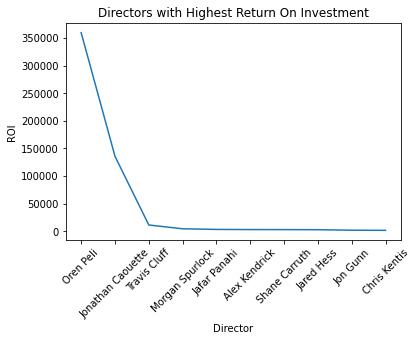

In [25]:
plt.plot(df_plot.index, df_plot)
plt.xticks(rotation = 45)
plt.title("Directors with Highest Return On Investment")
plt.xlabel("Director")
plt.ylabel("ROI")
plt.show()

13. create a [line plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) that displays two lines: a green dashed line for average gross earning over the years, and a red dotted line for average budget over the years. Add proper legend for the plot. Properly title the plot and label the axes.


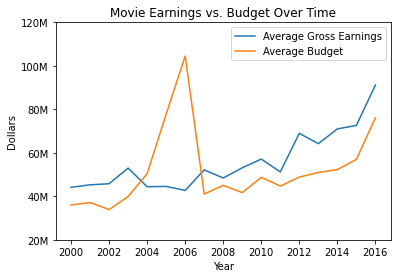

In [26]:
df_plot2 = df.groupby("title_year")["gross"].mean()
df_plot3 = df.groupby("title_year")["budget"].mean()
plt.plot(df_plot2.index, df_plot2, label = "Average Gross Earnings")
plt.plot(df_plot3.index, df_plot3, label = "Average Budget")
plt.legend()
plt.title("Movie Earnings vs. Budget Over Time")
plt.xlabel("Year")
plt.ylabel("Dollars")
plt.yticks([20000000, 40000000, 60000000, 80000000, 100000000, 120000000], ["20M", "40M", "60M", "80M", "100M", "120M"])
plt.show()

14. Calculate the average imdb_score and average ROI for movies made by each director. Then create a [scatter plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter) that displays the two for all directors. Properly size the markers and title the plot and label the axes. Rotate the axes labels if needed.


In [27]:
director_stats = df.groupby(df.director_name)[["imdb_score", "ROI"]].agg("mean")

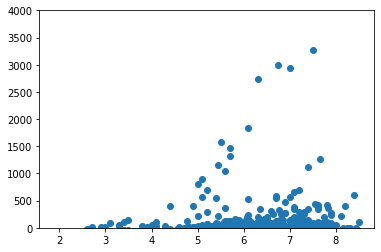

In [28]:
plt.scatter(director_stats.imdb_score, director_stats.ROI)
plt.ylim(0,4000)
plt.show()

In [29]:
df[["movie_title", "director_name", "ROI"]].sort_values("ROI", ascending = False).head()

,movie_title,director_name,ROI
4793,Paranormal Activity,Oren Peli,359624.276667
4799,Tarnation,Jonathan Caouette,135683.027523
4956,The Gallows,Travis Cluff,11278.909500
4977,Super Size Me,Morgan Spurlock,8768.744615
4791,Napoleon Dynamite,Jared Hess,5467.619500


##Modeling

15. Use [.select_dtypes()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) to drop the non-numerical (object) variables from the dataset (Boolean variables are considered numerical in Python, and can be used in models). Create a decision tree model to predict the "profitable" variable. Make sure to drop the 'profitable','roi','gross','profit' variables from the predictive dataset (X) because they are we calculated 'profitable' from them. Use train and test datasets and compare their accuracy to make sure you are not over-fitting. Tune the model to get the most accurate model you can.

    Print the train and test accuracy rate, and plot the tree for your best model.

In [30]:
df.drop(df.select_dtypes(object), axis = 1, inplace = True)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
print(df.columns)
print(df.head())

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'profit', 'ROI', 'imdb_quality', 'Action',
       'Crime', 'Drama', 'Documentary', 'Romance', 'profitable',
       'content_rating_G', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_R'],
      dtype='object')
   num_critic_for_reviews  duration  ...  content_rating_PG-13  content_rating_R
0                0.889299  0.593333  ...                     1                 0
1                0.371464  0.563333  ...                     1                 0
2                0.740467  0.493333  ...                     1                 0
3                1.000000  0.546667  ...                     1                

In [54]:
X = df.drop(["profitable", "ROI", "gross", "profit", "aspect_ratio"], axis = 1)
y = df["profitable"]
seed = 1

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [56]:
dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5, random_state = seed)

In [57]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

In [58]:
y_pred = dt.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8003663003663004


16. Create Random Forest model to predict the 'profitable' variable, like the previous question. You can use the same X and y datasets. Tune your model to get the best accuracy rate over the train and test datasets. Print the accuracy rates for your best model. 

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 10, random_state = seed)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=200, random_state=1)

In [61]:
y_pred = rf.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.8076923076923077


17. Create a linear and a ridge regression model to predict "roi" variable. Make sure to drop the 'profitable', 'roi', 'gross', 'profit' variables from the predictive dataset (X) because they are closely claculated in relation to 'roi'. Use train and test datasets and compare their accuracy (error rate). Plot the coefficients to see which variables contribute most to movies' ROI. Which of the simple linear and ridge regressions work better?

    **Note:** You need to normalize your X dataset before you create regression models.

In [62]:
X2 = X.drop(X.loc[:, "Action":"content_rating_R"], axis = 1)
y2 = df["ROI"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = seed)

from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept = True)
lr.fit(X2_train, y2_train)

y_pred_linear = lr.predict(X2_test)
residuals_linear = y_pred_linear - y2_test
MSE_linear = np.mean(np.square(residuals_linear))
RMSE_linear = np.sqrt(MSE)

print(MSE_linear)
print(RMSE_linear)

34268190.84715738
5860.111022553365


In [63]:
from sklearn.linear_model import Ridge

ridge = Ridge(fit_intercept = True)
ridge.fit(X2_train, y2_train)

y_pred_ridge = ridge.predict(X2_test)
residuals_ridge = y_pred_ridge - y2_test
MSE_ridge = np.mean(np.square(residuals_ridge))
RMSE_ridge = np.sqrt(MSE_ridge)

print(MSE_ridge)
print(RMSE_ridge)

34268234.31686455
5853.90761089245


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.24758e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[]

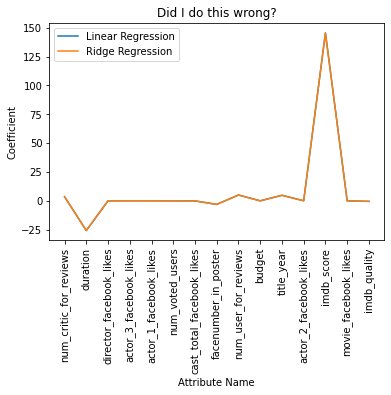

In [64]:
plt.plot(lr.feature_names_in_, lr.coef_, label = "Linear Regression")
plt.plot(ridge.feature_names_in_, ridge.coef_, label = "Ridge Regression")
plt.xlabel("Attribute Name")
plt.ylabel("Coefficient")
plt.title("Did I do this wrong?")
plt.xticks(rotation = 90)
plt.legend()
plt.plot()

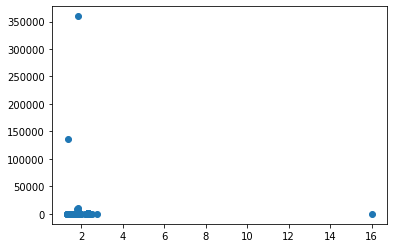